In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
# from tensorflow.examples.tutorials.cifar10 import input_data
cifar10 = tf.keras.datasets.cifar10 
input_data = cifar10.load_data()
batch_size = 100
test_size = 256

In [2]:
import math
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 3
    n_rows = 3
    activity = []
    for i in range(filters):
        activity.append((np.sum(units[0,:,:,i]),i))
    
    activity = sorted(activity, reverse = True)
    a,b = list(zip(*activity))
    count = 0
    for i in b[:9]:
        plt.subplot(n_rows, n_columns, count+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

        count += 1
        

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

0 0.37109375
1 0.62890625
2 0.5546875
3 0.58203125
4 0.51953125
5 0.5234375
6 0.47265625
7 0.55859375
8 0.546875
9 0.54296875
10 0.55078125
11 0.55859375
12 0.53125
13 0.59375
14 0.53515625


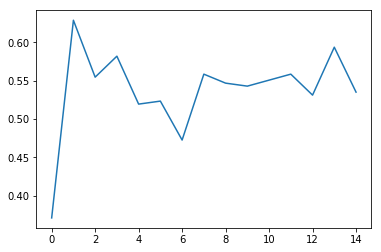

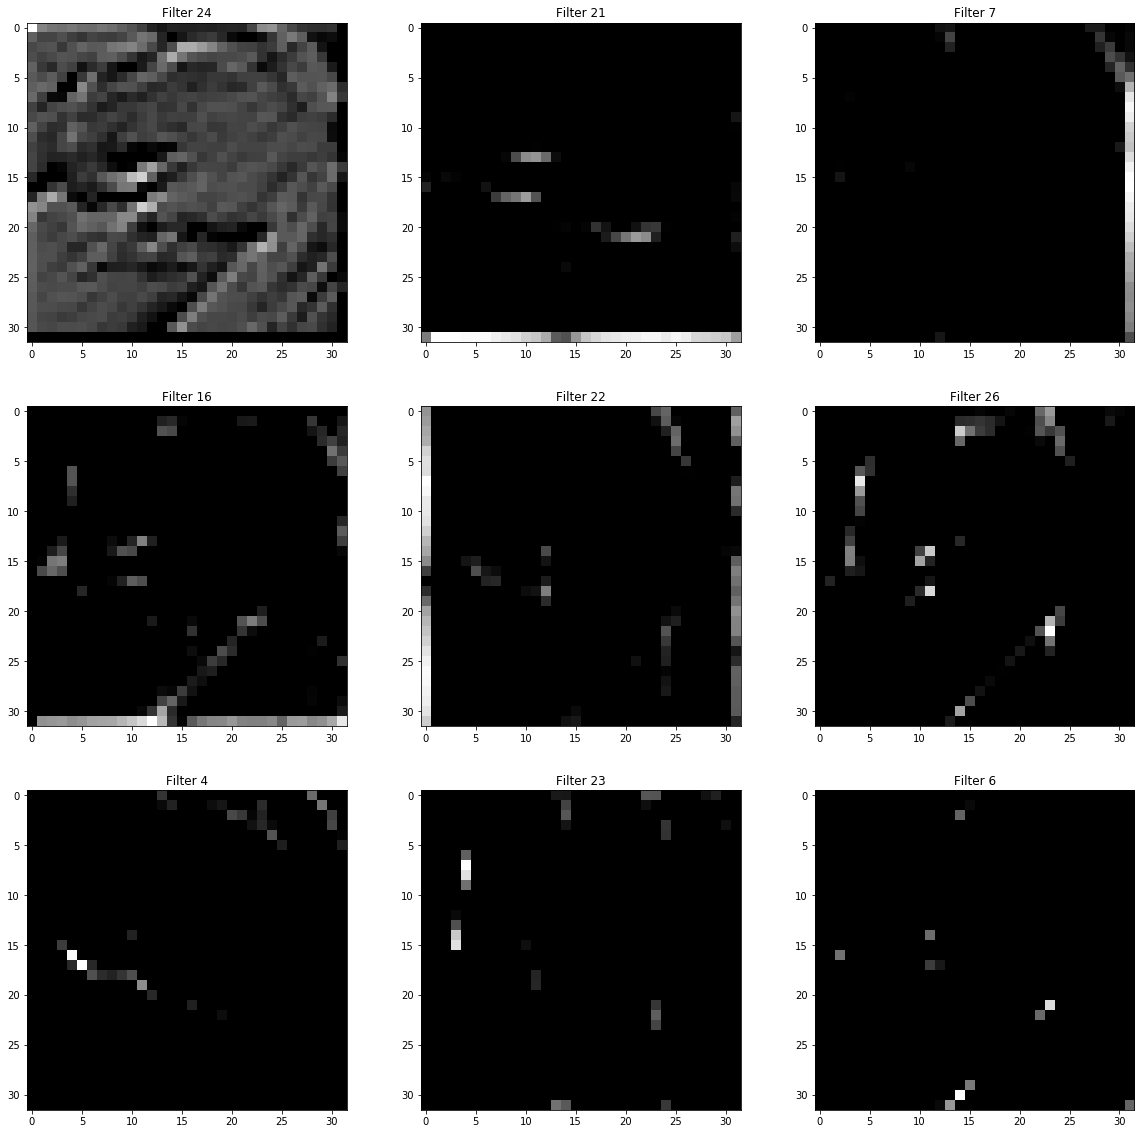

0 0.359375
1 0.50390625
2 0.625
3 0.55859375
4 0.65625
5 0.6484375
6 0.6171875
7 0.6484375
8 0.60546875
9 0.6484375
10 0.5234375
11 0.64453125
12 0.578125
13 0.625
14 0.5546875


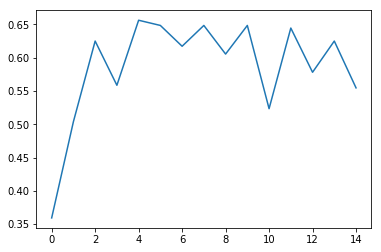

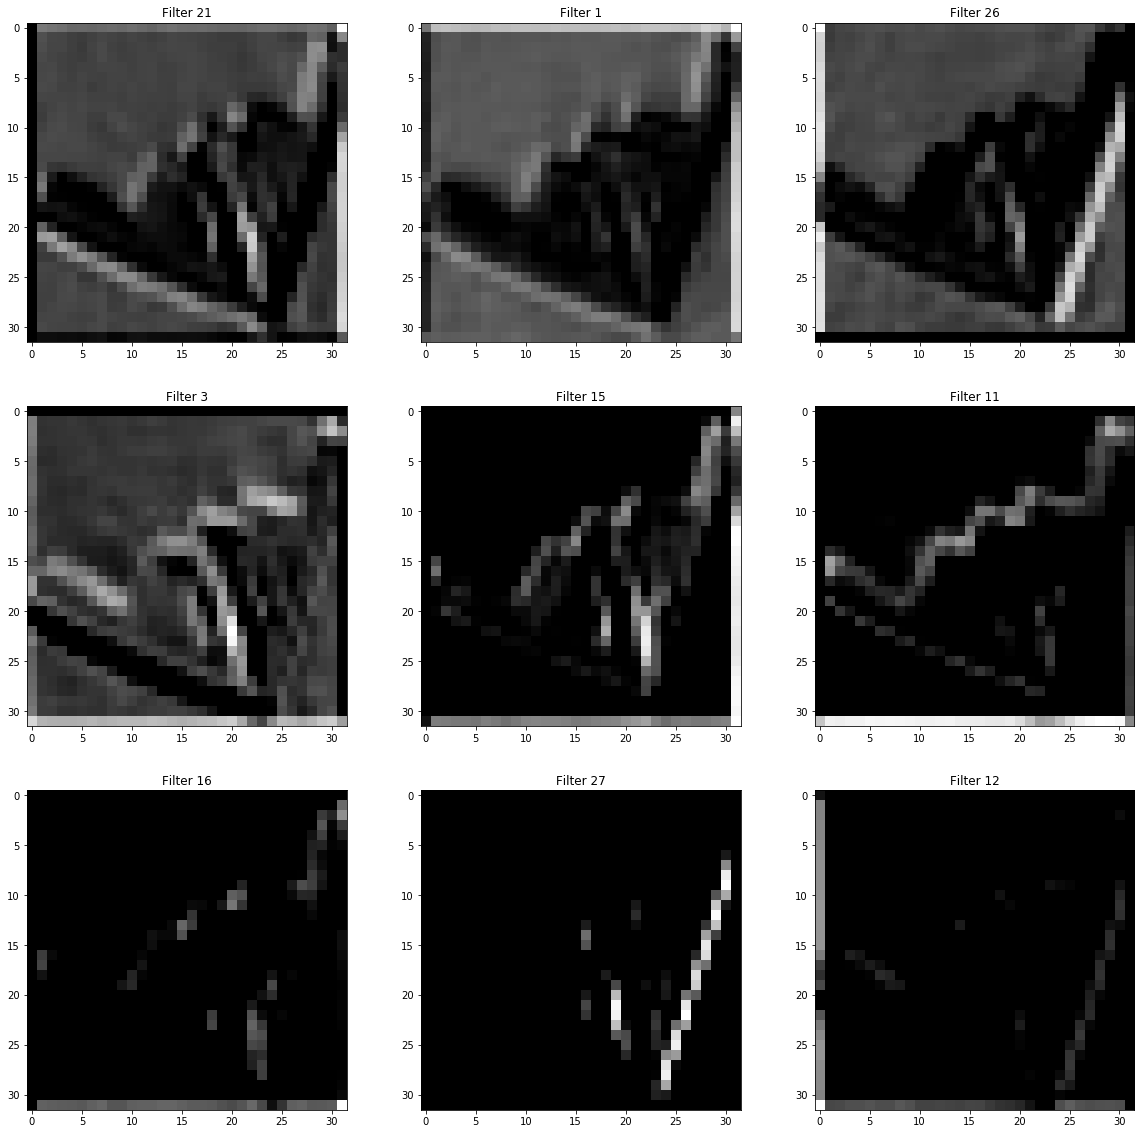

0 0.3671875
1 0.56640625
2 0.73046875
3 0.6953125
4 0.71875
5 0.67578125
6 0.671875
7 0.7265625
8 0.66015625
9 0.71875
10 0.77734375
11 0.67578125
12 0.72265625
13 0.6796875
14 0.71875


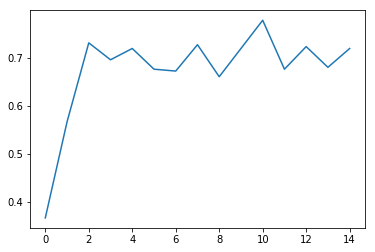

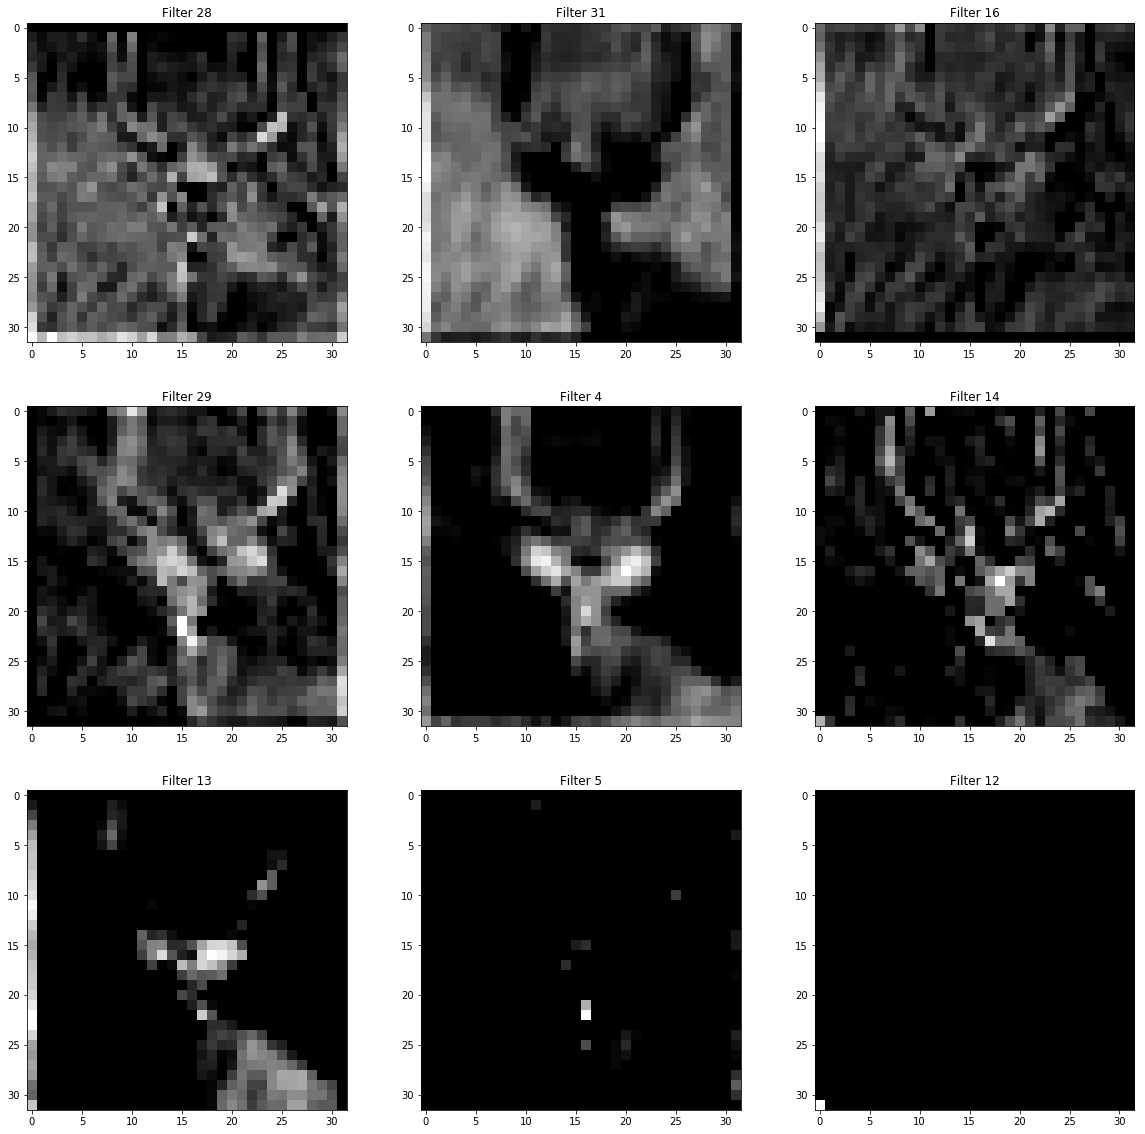

0 0.3203125
1 0.37890625
2 0.58984375
3 0.640625
4 0.6796875
5 0.71484375
6 0.734375
7 0.76171875
8 0.765625
9 0.73046875
10 0.63671875
11 0.73828125
12 0.68359375
13 0.70703125
14 0.69921875


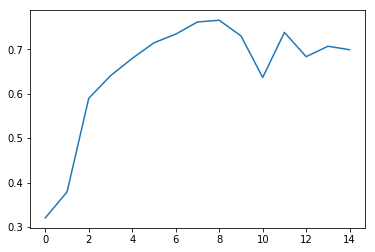

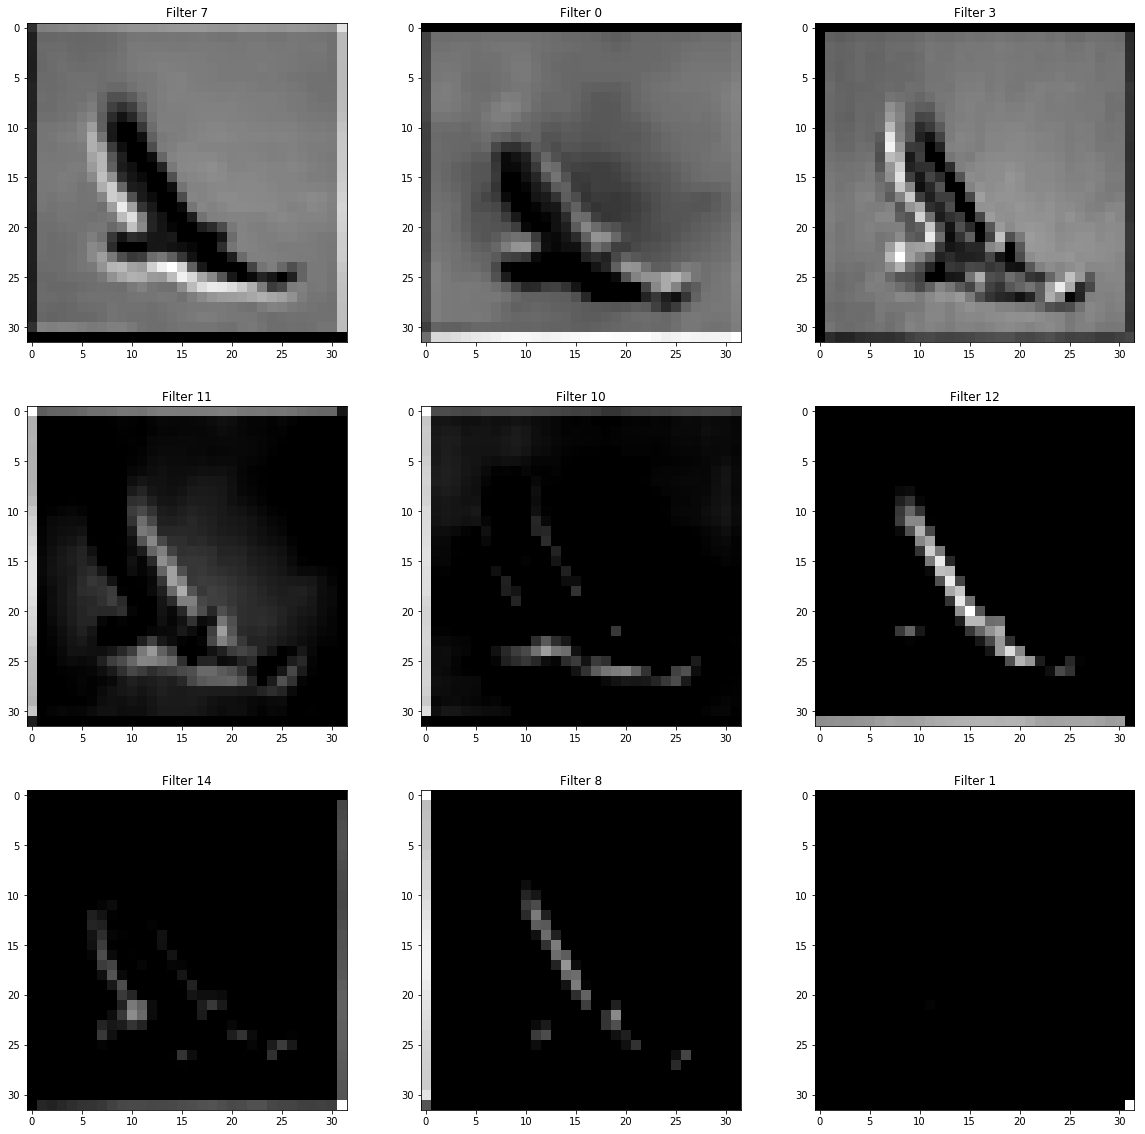

(?, 8, 8, 128)
0 0.2421875
1 0.50390625
2 0.609375
3 0.6171875
4 0.68359375
5 0.65625
6 0.703125
7 0.6796875
8 0.69140625
9 0.7109375
10 0.69921875
11 0.7109375
12 0.7265625
13 0.7421875
14 0.7265625


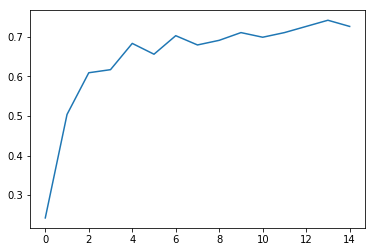

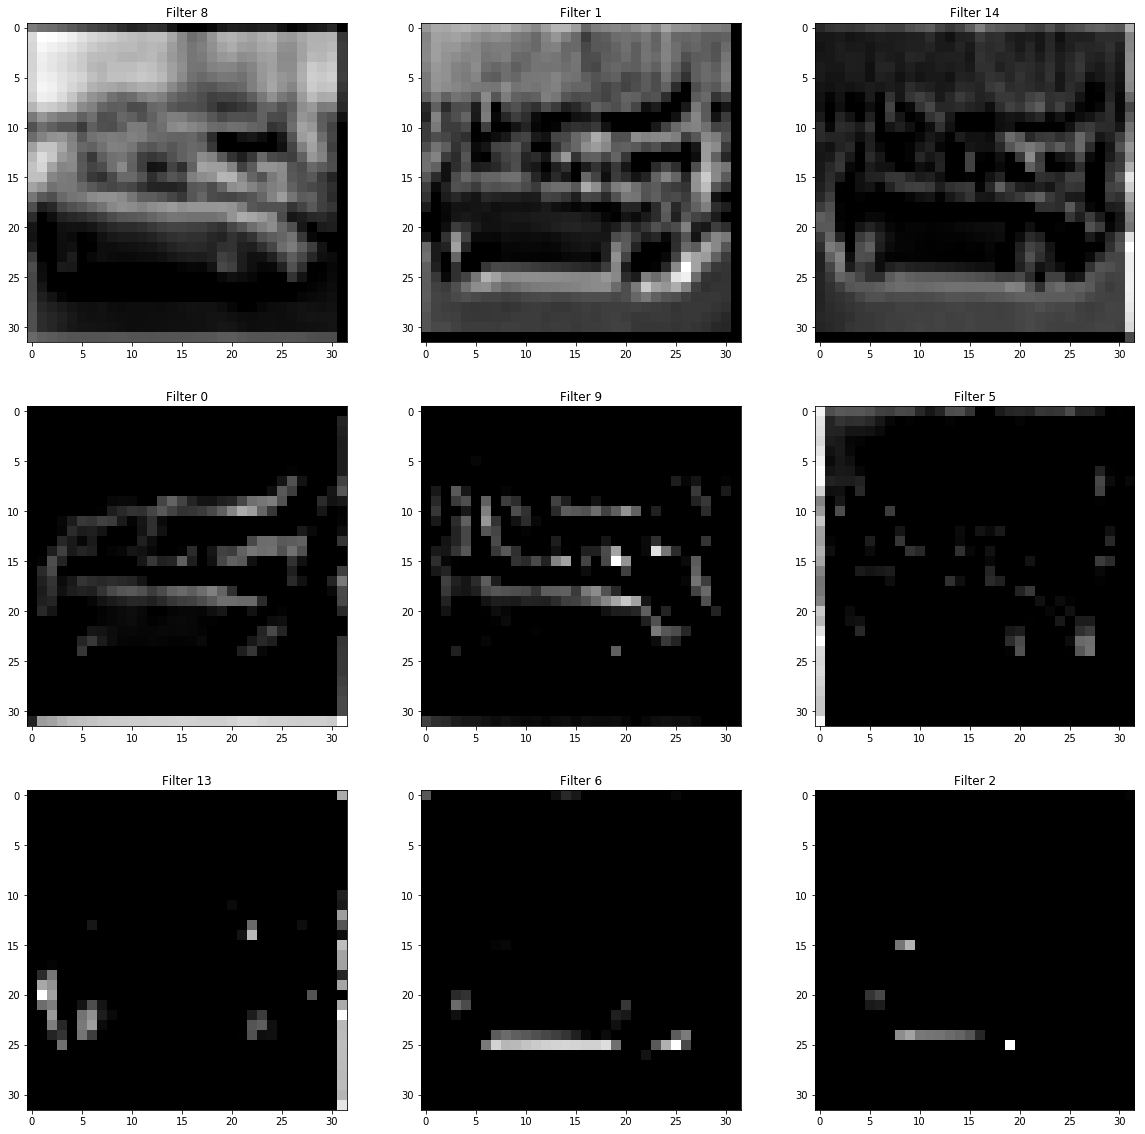

In [3]:
def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=0.01))



def model1(X, w, w_fc, w_o, p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 28, 28, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    
    l1 = tf.nn.max_pool(l1a, ksize=[1, 2, 2, 1],              # l1 shape=(?, 14, 14, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    s1,s2,s3,s4 = l1.get_shape().as_list()
    dense_shape = s4*s2*s3
    l1 = tf.nn.dropout(l1, p_keep_conv)
    tf.summary.histogram('histogram_w', w)
    
    l3 = tf.reshape(l1, [-1, dense_shape])    # reshape to (?, 14x14x32)

    l4 = tf.nn.relu(tf.matmul(l3, w_fc))
    tf.summary.histogram('histogram_w_fc', w_fc)
    l4 = tf.nn.dropout(l4, p_keep_hidden)
    #print(l4.shape)
    pyx = tf.matmul(l4, w_o)
    #print(pyx.shape)
    merged = tf.summary.merge_all()
    return pyx, merged, l1a

def model2(X, w, w_fc, w_o, p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 28, 28, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    tf.summary.histogram('histogram_w', w)
    w1 = init_weights([3, 3, 32, 64]) 
    tf.summary.histogram('histogram_w', w1)
    l1b = tf.nn.relu(tf.nn.conv2d(l1a, w1,                       # l1a shape=(?, 28, 28, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l1 = tf.nn.max_pool(l1b, ksize=[1, 2, 2, 1],              # l1 shape=(?, 14, 14, 32)
                        strides=[1, 4, 2, 1], padding='SAME')
    s1,s2,s3,s4 = l1.get_shape().as_list()
    dense_shape = s4*s2*s3
    l1 = tf.nn.dropout(l1, p_keep_conv)
    

    l3 = tf.reshape(l1, [-1, dense_shape])    # reshape to (?, 14x14x32)

    l4 = tf.nn.relu(tf.matmul(l3, w_fc))
    l4 = tf.nn.dropout(l4, p_keep_hidden)
    #print(l4.shape)
    pyx = tf.matmul(l4, w_o)
    #print(pyx.shape)
    merged = tf.summary.merge_all()
    return pyx, merged, l1a

def model3(X, w, w_fc, w_o, p_keep_conv, p_keep_hidden):
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 32, 32, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    tf.summary.histogram('histogram_w', w)
    w1 = init_weights([3, 3, 32, 64]) 
    l1b = tf.nn.relu(tf.nn.conv2d(l1a, w1,                       # l1a shape=(?, 32, 32, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l1 = tf.nn.max_pool(l1b, ksize=[1, 2, 2, 1],              # l1 shape=(?, 16, 16, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    w2 = init_weights([3, 3, 64, 64]) 
    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                       # l1a shape=(?, 16, 16, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    w3 = init_weights([3, 3, 64, 128]) 
    l2b = tf.nn.relu(tf.nn.conv2d(l2a, w3,                       # l1a shape=(?, 16, 16, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2b, ksize=[1, 2, 2, 1],              # l1 shape=(?, 8, 8, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    w_fc = init_weights([128 * 8 * 8, 625])
    l3 = tf.reshape(l2, [-1, w_fc.get_shape().as_list()[0]])    # reshape to (?, 14x14x32)
 
    
    l4 = tf.nn.relu(tf.matmul(l3, w_fc))
    l4 = tf.nn.dropout(l4, p_keep_hidden)
    #print(l4.shape)
    pyx = tf.matmul(l4, w_o)
    merged = tf.summary.merge_all()
    return pyx, merged, l1a

def model4(X, w, w_fc, w_o, p_keep_conv, p_keep_hidden):
    w = init_weights([3, 3, 3, 16])
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 32, 32, 16)
                        strides=[1, 1, 1, 1], padding='SAME'))
    tf.summary.histogram('histogram_w', w)
    w1 = init_weights([3, 3, 16, 32]) 
    l1b = tf.nn.relu(tf.nn.conv2d(l1a, w1,                       # l1a shape=(?, 32, 32, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    w1c = init_weights([3, 3, 32, 32]) 
    l1c = tf.nn.relu(tf.nn.conv2d(l1b, w1c,                       # l1a shape=(?, 32, 32, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    
    l1 = tf.nn.max_pool(l1c, ksize=[1, 2, 2, 1],              # l1 shape=(?, 16, 16, 32)
                        strides=[1, 2, 2, 1], padding='SAME')
    w2 = init_weights([3, 3, 32, 64]) 
    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                       # l1a shape=(?, 16, 16, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    w3 = init_weights([3, 3, 64, 64]) 
    l2b = tf.nn.relu(tf.nn.conv2d(l2a, w3,                       # l1a shape=(?, 16, 16, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2b, ksize=[1, 2, 2, 1],              # l1 shape=(?, 8, 8, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)

    w_fc = init_weights([64 * 8 * 8, 625])
    l3 = tf.reshape(l2, [-1, w_fc.get_shape().as_list()[0]])    # reshape to (?, 14x14x32)
 
    
    l4 = tf.nn.relu(tf.matmul(l3, w_fc))
    l4 = tf.nn.dropout(l4, p_keep_hidden)
    #print(l4.shape)
    pyx = tf.matmul(l4, w_o)
    #print(pyx.shape)
    merged = tf.summary.merge_all()
    return pyx, merged, l1a

def model5(X, w, w_fc, w_o, p_keep_conv, p_keep_hidden):
    w = init_weights([3, 3, 3, 16])
    l1a = tf.nn.relu(tf.nn.conv2d(X, w,                       # l1a shape=(?, 32, 32, 16)
                        strides=[1, 1, 1, 1], padding='SAME'))
    tf.summary.histogram('histogram_w', w)
    w1 = init_weights([3, 3, 16, 32]) 
    l1b = tf.nn.relu(tf.nn.conv2d(l1a, w1,                       # l1a shape=(?, 32, 32, 32)
                        strides=[1, 1, 1, 1], padding='SAME'))
    w1c = init_weights([3, 3, 32, 64]) 
    l1c = tf.nn.relu(tf.nn.conv2d(l1b, w1c,                       # l1a shape=(?, 32, 32, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    
    l1 = tf.nn.max_pool(l1c, ksize=[1, 2, 2, 1],              # l1 shape=(?, 16, 16, 64)
                        strides=[1, 2, 2, 1], padding='SAME')
    w2 = init_weights([3, 3, 64, 64]) 
    l2a = tf.nn.relu(tf.nn.conv2d(l1, w2,                       # l1a shape=(?, 16, 16, 64)
                        strides=[1, 1, 1, 1], padding='SAME'))
    w3 = init_weights([3, 3, 64, 128]) 
    l2b = tf.nn.relu(tf.nn.conv2d(l2a, w3,                       # l1a shape=(?, 16, 16, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    w4 = init_weights([3, 3, 128, 128]) 
    l2c = tf.nn.relu(tf.nn.conv2d(l2b, w4,                       # l1a shape=(?, 16, 16, 128)
                        strides=[1, 1, 1, 1], padding='SAME'))
    l2 = tf.nn.max_pool(l2c, ksize=[1, 2, 2, 1],              # l1 shape=(?, 8, 8, 128)
                        strides=[1, 2, 2, 1], padding='SAME')
    l2 = tf.nn.dropout(l2, p_keep_conv)
    print(l2.shape)
    w_fc = init_weights([128 * 8 * 8, 625])
    l3 = tf.reshape(l2, [-1, w_fc.get_shape().as_list()[0]])    # reshape to (?, 14x14x32)
 
    
    l4 = tf.nn.relu(tf.matmul(l3, w_fc))
    l4 = tf.nn.dropout(l4, p_keep_hidden)
    #print(l4.shape)
    pyx = tf.matmul(l4, w_o)
    #print(pyx.shape)
    merged = tf.summary.merge_all()
    return pyx, merged, l1a

trX, trY, teX, teY = input_data[0][0], input_data[0][1], input_data[1][0], input_data[1][1]
trY = tf.keras.utils.to_categorical(trY, num_classes=10)
teY = tf.keras.utils.to_categorical(teY, num_classes=10)
trX = trX.reshape(-1, 32, 32, 3)  # 28x28x1 input img
teX = teX.reshape(-1, 32, 32, 3)  # 28x28x1 input img


for i in range(1,6):
    accuracies = []
    with tf.Graph().as_default():
#         tf.reset_default_graph()
        X = tf.placeholder("float", [None, 32, 32, 3], name="X")
        Y = tf.placeholder("float", [None, 10], name="Y")

        w = init_weights([3, 3, 3, 32])       # 3x3x1 conv, 32 outputs
        w_fc = init_weights([32 * 16 * 16, 625]) # FC 32 * 14 * 14 inputs, 625 outputs
        w_o = init_weights([625, 10])         # FC 625 inputs, 10 outputs (labels)

        p_keep_conv = tf.placeholder("float")
        p_keep_hidden = tf.placeholder("float")
        modelA = "model"+str(i)
        py_x, merged, l1a = eval(modelA)(X, w, w_fc, w_o, p_keep_conv, p_keep_hidden)
    #     py_x, merged = model5(X, w, w_fc, w_o, p_keep_conv, p_keep_hidden)

        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=py_x, labels=Y))
        train_op = tf.train.RMSPropOptimizer(0.001, 0.9).minimize(cost)
        predict_op = tf.argmax(py_x, 1)

        # Launch the graph in a session

        with tf.Session() as sess:
            writer = tf.summary.FileWriter( './'+str(i),sess.graph)
            # you need to initialize all variables
            tf.global_variables_initializer().run()

            for i in range(15):

                training_batch = zip(range(0, len(trX), batch_size),
                                     range(batch_size, len(trX)+1, batch_size))
        #         print(list(training_batch))
                for start, end in training_batch:
                    sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end],
                                                  p_keep_conv: 0.8, p_keep_hidden: 0.5})


                test_indices = np.arange(len(teX)) # Get A Test Batch
                np.random.shuffle(test_indices)
                test_indices = test_indices[0:test_size]


                summary,predict, patch_ = sess.run([merged,predict_op, l1a], feed_dict={X: teX[test_indices],
                                                                 p_keep_conv: 1.0,
                                                                 p_keep_hidden: 1.0})
                acc = np.mean(np.argmax(teY[test_indices], axis=1) ==predict)
                print(i, acc)
                accuracies.append(acc)
    #             print(i, np.mean(np.argmax(teY, axis=1) == predict))
                writer.add_summary(summary, global_step=i)
            units = sess.run(l1a, feed_dict={X: teX[test_indices],
                                                         p_keep_conv: 1.0,
                                                         p_keep_hidden: 1.0})
            
            writer.flush()
            plt.plot(accuracies)
            plt.show()
            plotNNFilter(units)
            plt.show()